### Theoretical black hole mass function (BHMF), AGN luminosity function (LF), and black hole merger rates

This Jupyter notebook explains the files in this folder and visualizes the BHMF, the AGN LF, and the merger rate distributions. The reference paper is Liu and Inayoshi (2024), *Title* ([url](https://ui.adsabs.harvard.edu/abs/url)).

In the name of each file, "nh" and "nl" denote $\log n_{0h}$ and $\log n_{0l}$, the independent parameters in our models.  The fiducial model is "nh-3nl0". The csv files include the intrinsic BHMF, the intrinsic AGN LF, and the unobscured AGN LF $z=5$, decomposed into the heavy- and light-seed populations.

In [38]:
# Visualization
# packages
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import LogLocator, MaxNLocator, AutoMinorLocator
import matplotlib.colors as mcolors
import h5py

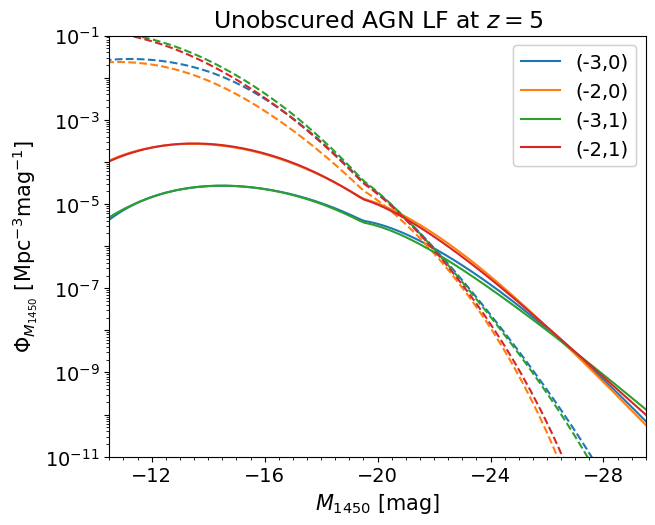

In [16]:
# Reproducing Figure 6 in the paper (only theoretical curves)
def plot_lf_func(data, ax, label, **kwargs):
    l1, = ax.plot(data[:,0],data[:,1],label=label,**kwargs)
    ax.plot(data[:,0],data[:,2],linestyle='--',**kwargs)
    return l1

def plot_mf_func(data, ax, label, **kwargs):
    l1, = ax.loglog(data[:,0],data[:,1],label=label,**kwargs)
    ax.loglog(data[:,0],data[:,2],linestyle='--',**kwargs)
    return l1

# load data
directory = ''
lf = np.loadtxt(directory+'AGNLF_nh-3nl0z5.csv', delimiter=',', skiprows=4)
lf1 = np.loadtxt(directory+'AGNLF_nh-2nl0z5.csv', delimiter=',', skiprows=4)
lf2 = np.loadtxt(directory+'AGNLF_nh-3nl1z5.csv', delimiter=',', skiprows=4)
lf3 = np.loadtxt(directory+'AGNLF_nh-2nl1z5.csv', delimiter=',', skiprows=4)

# plot
fig, ax = plt.subplots(figsize=(7.2,5.4))
l0 = plot_lf_func(lf,ax,r'(-3,0)',color='C0')
l1 = plot_lf_func(lf1,ax,r'(-2,0)',color='C1')
l2 = plot_lf_func(lf2,ax,r'(-3,1)',color='C2')
l3 = plot_lf_func(lf3,ax,r'(-2,1)',color='C3')

# visualization cosmetics
lgd = ax.legend(handles=[l0,l1,l2,l3],fontsize=14,loc='upper right')
ax.set_xlim(-10.5,-29.5)
ax.set_ylim(1e-11,1e-1)
ax.set_title('Unobscured AGN LF at $z=5$', fontsize=17)
ax.set_xlabel(r'$M_{1450}\ [\rm mag]$', fontsize=15)
ax.set_ylabel(r'$\Phi_{M_{1450}}\ [\rm Mpc^{-3}mag^{-1}]$', fontsize=15)
ax.set_yscale('log')
ax.yaxis.set_major_locator(LogLocator(base=10.0,numticks=15))
ax.yaxis.set_minor_locator(LogLocator(base=10.0,subs='all',numticks=15))
plt.setp(plt.gca().get_yminorticklabels(), visible=False)
plt.setp(plt.gca().get_ymajorticklabels()[::2], visible=False)
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax.xaxis.set_minor_locator(MaxNLocator(nbins=40))
ax.tick_params(labelsize=14)
ax.add_artist(lgd)
plt.subplots_adjust(left=0.155, bottom=0.12, right=None, top=0.9, wspace=None, hspace=None)
plt.show()

[1.01157945e+00 1.03514217e+00 1.05925373e+00 ... 9.44060876e+10
 9.66050879e+10 9.88553095e+10]


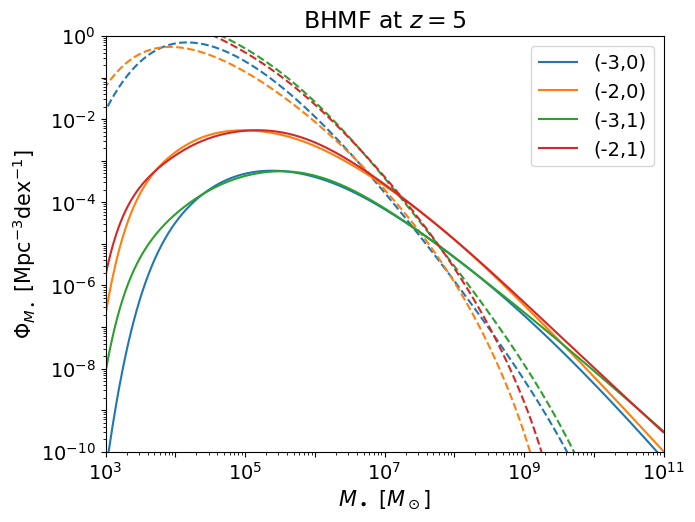

In [19]:
# Reproducing Figure 7 in the paper
# load data
mf = np.loadtxt(directory+'BHMF_nh-3nl0z5.csv', delimiter=',', skiprows=4)
mf1 = np.loadtxt(directory+'BHMF_nh-2nl0z5.csv', delimiter=',', skiprows=4)
mf2 = np.loadtxt(directory+'BHMF_nh-3nl1z5.csv', delimiter=',', skiprows=4)
mf3 = np.loadtxt(directory+'BHMF_nh-2nl1z5.csv', delimiter=',', skiprows=4)

# plot
fig1, ax1 = plt.subplots(figsize=(7.2,5.4))
plot_mf_func(mf,ax1,r'(-3,0)',color='C0')
plot_mf_func(mf1,ax1,r'(-2,0)',color='C1')
plot_mf_func(mf2,ax1,r'(-3,1)',color='C2')
plot_mf_func(mf3,ax1,r'(-2,1)',color='C3')

# visualization cosmetics
ax1.set_title('BHMF at $z=5$', fontsize=17)
ax1.set_xlabel(r'$M_\bullet\ [M_\odot]$', fontsize=15)
ax1.set_ylabel(r'$\Phi_{M_\bullet}\ [\rm Mpc^{-3}dex^{-1}]$', fontsize=15)
ax1.xaxis.set_major_locator(LogLocator(base=10.0,numticks=15))
ax1.xaxis.set_minor_locator(LogLocator(base=10.0,subs='all',numticks=15))
ax1.yaxis.set_major_locator(LogLocator(base=10.0,numticks=15))
ax1.yaxis.set_minor_locator(LogLocator(base=10.0,subs='all',numticks=15))
plt.setp(plt.gca().get_xminorticklabels(), visible=False)
plt.setp(plt.gca().get_xmajorticklabels()[1::2], visible=False)
plt.setp(plt.gca().get_yminorticklabels(), visible=False)
plt.setp(plt.gca().get_ymajorticklabels()[::2], visible=False)
ax1.set_xlim(1e3,1e11)
ax1.set_ylim(1e-10,1e0)
ax1.tick_params(labelsize=14)
ax1.legend(fontsize=14)
plt.show()

h5 file keys: <KeysViewHDF5 ['M_BH', 'Phi_h_z', 'Phi_l_z', 'rate_all_hh', 'rate_all_hl', 'rate_all_ll', 'rate_major_hh', 'rate_major_hl', 'rate_major_ll', 'z']>
h5 metadata keys: <KeysViewHDF5 ['description']>
Merger rate distribution as a function of remnant mass and redshift. 
Data descripton:
M_BH: BH remnant mass; z: redshift; 
rate_all_hh: heavy-heavy merger rate of all mass ratios; rate_major_hh: major (q>=0.25) heavy-heavy mergers; 
rate_all_hl: heavy-light merger rate of all mass ratios; rate_major_hl: major (q>=0.25) heavy-light mergers; 
rate_all_ll: light-light merger rate of all mass ratios; rate_major_ll: major (q>=0.25) light-light mergers. 
This file also includes Phi_h_z and Phi_l_z, the intrinsic heavy-seed and light-seed BHMF at all redshifts.


/var/folders/jm/x_tnzyks1rvf6glsbxncphn00000gn/T/ipykernel_17907/3662839848.py:31: RuntimeWarning: divide by zero encountered in log10
  ax2[0].contourf(m_bh, z_arr, np.log10(rate),vmin=np.log10(vmin),vmax=np.log10(vmax),cmap=cmap_t,extend='both',levels=np.linspace(np.log10(vmin),np.log10(vmax),16))


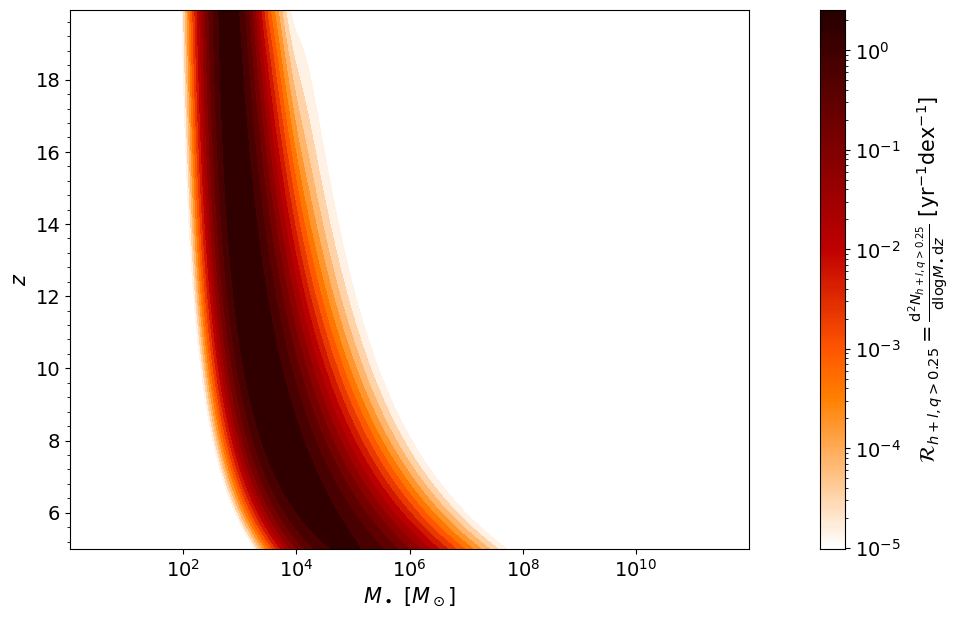

In [73]:
# Reproducing Figure 8 in the paper (only the main panel)
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
    if n == -1:
        n = cmap.N
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
         'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
         cmap(np.linspace(minval, maxval, n)))
    return new_cmap


# load data
directory = ''
filename = 'rate_nh-3nl0.h5'
with h5py.File(directory + filename) as file:
    print('h5 file keys:', file.keys())
    print('h5 metadata keys:', file.attrs.keys())
    print(file.attrs['description'])
    m_bh = file['M_BH'][:]
    z_arr = file['z'][:]
    rate_major_ll = file['rate_major_ll'][:]
    rate_major_hl = file['rate_major_hl'][:]
    rate_major_hh = file['rate_major_hh'][:]
    phi_h_z = file['Phi_h_z'][:]
rate = rate_major_ll + rate_major_hl + rate_major_hh

# plot
fig2, ax2 = plt.subplots(1,2,figsize=(10,7),width_ratios=[40,1.5])
vmax, vmin = np.max(rate), 1e-5
cmap = plt.get_cmap('gist_heat_r')
cmap_t = truncate_colormap(cmap, 0.0, 0.9)
ax2[0].contourf(m_bh, z_arr, np.log10(rate),vmin=np.log10(vmin),vmax=np.log10(vmax),cmap=cmap_t,extend='both',levels=np.linspace(np.log10(vmin),np.log10(vmax),16))

# visualization cosmetics
ax2[0].set_xscale('log')
ax2[0].set_xlabel(r'$M_\bullet\ [M_\odot]$', fontsize=15)
ax2[0].set_ylabel(r'$z$', fontsize=15)
ax2[0].tick_params(labelsize=14)
ax2[0].yaxis.set_minor_locator(AutoMinorLocator(5))
color_arr = np.tile(np.linspace(vmin,vmax,256),(2,1)).T
pcolory = np.logspace(np.log10(vmin),np.log10(vmax),256)
ax2[1].pcolormesh([0,1],pcolory,color_arr,cmap=cmap_t)
ax2[1].yaxis.tick_right()
ax2[1].set_yscale('log')
ax2[1].yaxis.set_label_position('right')
ax2[1].tick_params(bottom=False, labelbottom=False, left=False, labelleft=False, right=True, labelright=True, labelsize=15)
ax2[1].set_ylabel(r'$\mathcal{R}_{h+l,q>0.25}=\frac{{\rm d}^2N_{h+l,q>0.25}}{{\rm dlog}M_\bullet{\rm d}z}\ [{\rm yr^{-1}dex^{-1}}]$', fontsize=15)
ax2[1].tick_params(labelsize=14)
plt.show()